In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
# read the CSV file 'number_of_reported_fatalities_by_country-year_as-of-12Dec2025.csv' into a DataFrame
path = '../data/ACLED/number_of_reported_fatalities_by_country-year_as-of-12Dec2025.csv'
df = pd.read_csv(path, encoding='utf-8', sep=';')

# display the first few rows of the DataFrame
print(df.head())

       COUNTRY  YEAR  FATALITIES
0  Afghanistan  2017       36360
1  Afghanistan  2018       42991
2  Afghanistan  2019       41419
3  Afghanistan  2020       30977
4  Afghanistan  2021       42425


In [20]:
# Focusing on the year 2025 and on 'countries involved' (meaning countries with 'FATALITIES' >= 10)
df_2025 = df[(df['YEAR'] == 2025) & (df['FATALITIES'] >= 10)].copy()

# We now view the 'FATALITIES' column
#print(df_2025['FATALITIES'])
df_2025['FATALITIES'].describe()

count       73.000000
mean      3078.945205
std       9161.345854
min         10.000000
25%         50.000000
50%        304.000000
75%       2178.000000
max      73018.000000
Name: FATALITIES, dtype: float64

In [21]:
# clustering the 'FATALITIES' data into 3 clusters and hoping they are balanced
# clusters are 0 <= x < 100, 100 <= x < 1000, x >= 1000
bins = [0, 100, 1000, float('inf')]
labels = ['Low', 'Medium', 'High']
df_2025['FATALITY_CLUSTER'] = pd.cut(df_2025['FATALITIES'], bins=bins, labels=labels, right=False)
print(df_2025['FATALITY_CLUSTER'].value_counts())

FATALITY_CLUSTER
Medium    27
Low       23
High      23
Name: count, dtype: int64


In [22]:
df_2025.head()

,COUNTRY,YEAR,FATALITIES,FATALITY_CLUSTER
8,Afghanistan,2025,886,Medium
53,Algeria,2025,32,Low
91,Angola,2025,191,Medium
195,Bangladesh,2025,351,Medium
224,Belize,2025,31,Low


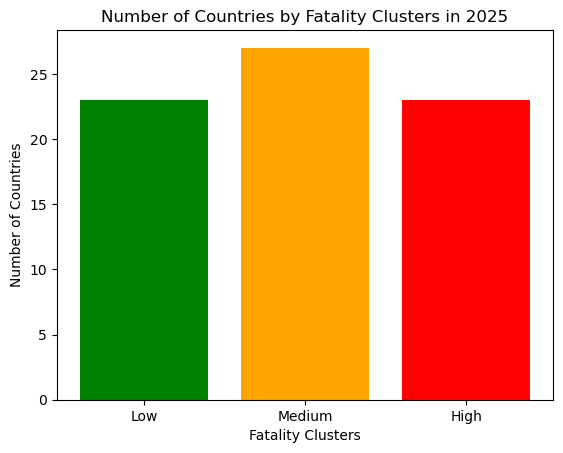

In [23]:
# display a bar chart with the labels of Fatality clusters on the x-axis and their counts (FATALITIES column) on the y-axis
cluster_counts = df_2025['FATALITY_CLUSTER'].value_counts().reindex(labels)
plt.bar(cluster_counts.index, cluster_counts.values, color=['green', 'orange', 'red'])
plt.xlabel('Fatality Clusters')
plt.ylabel('Number of Countries')
plt.title('Number of Countries by Fatality Clusters in 2025')
plt.show()

C:\Users\HEW14SDQ1006NL\AppData\Local\Temp\ipykernel_2500\3902058111.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  country_cluster_counts = df_2025.groupby(['FATALITY_CLUSTER', 'COUNTRY'])['FATALITIES'].sum().unstack(fill_value=0).reindex(labels)
C:\Users\HEW14SDQ1006NL\AppData\Local\Temp\ipykernel_2500\3902058111.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


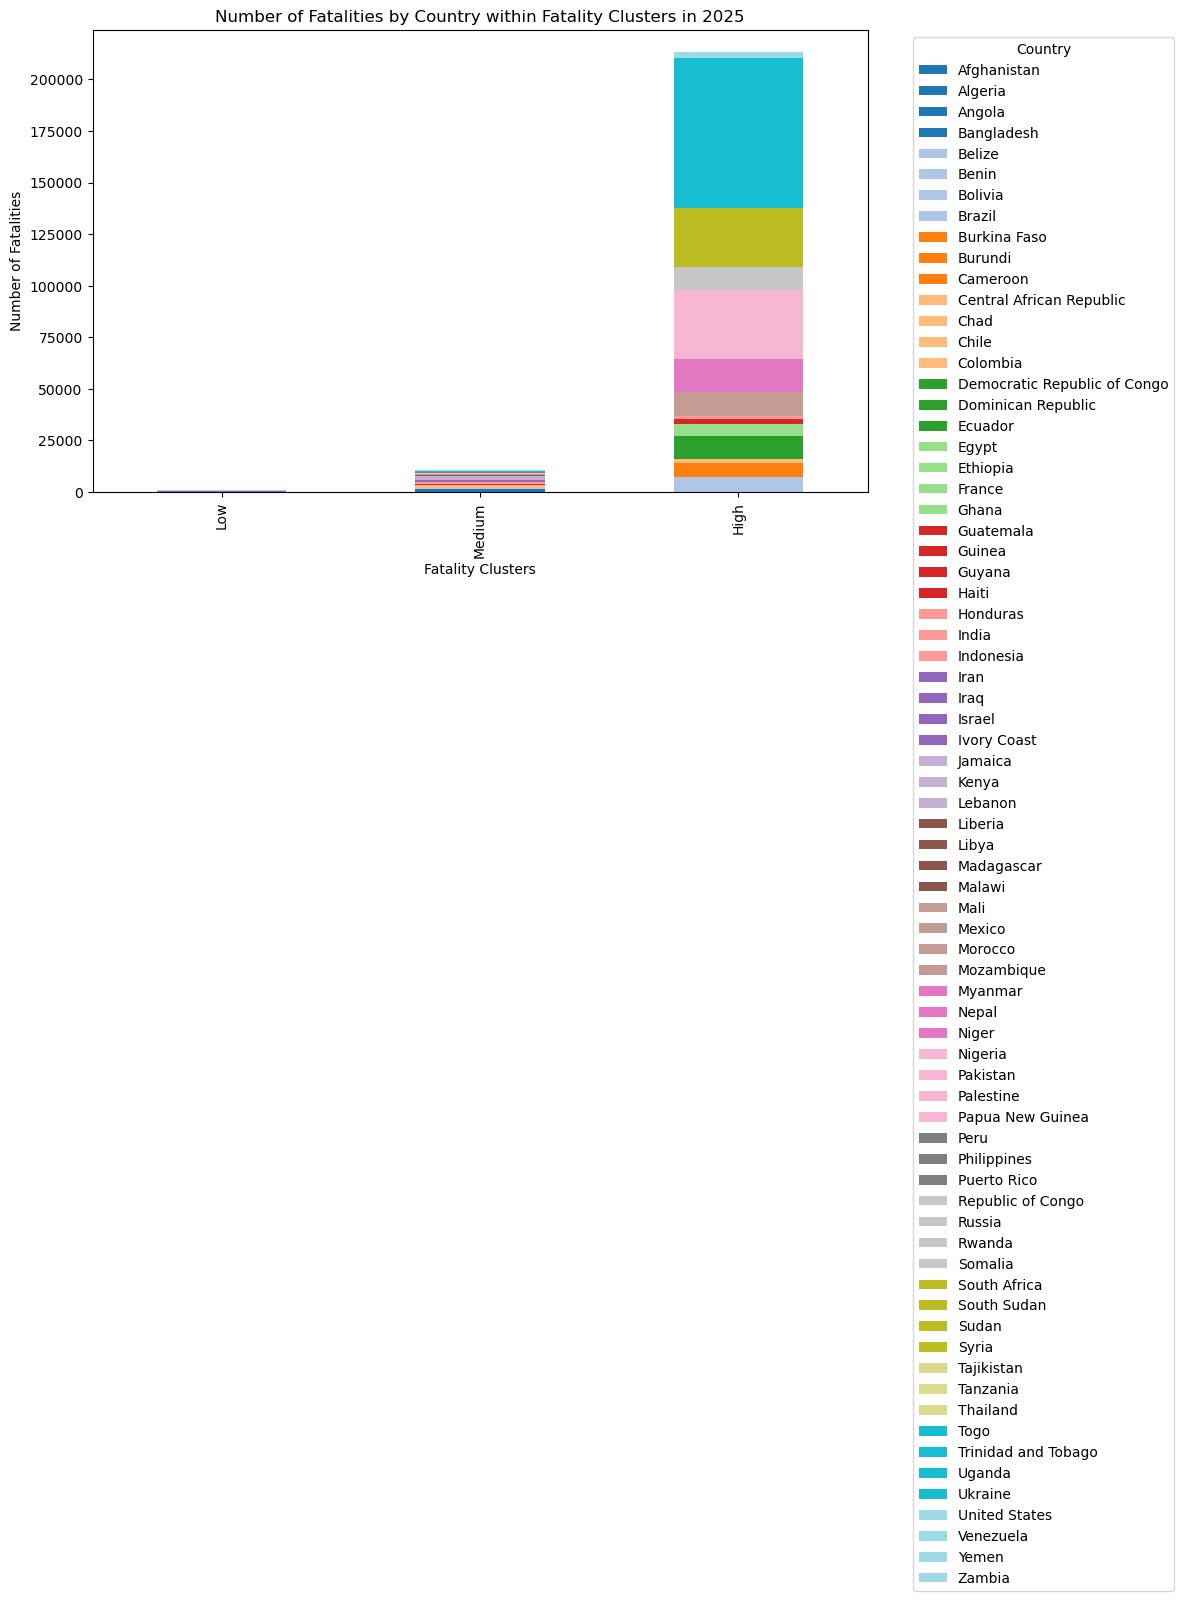

In [24]:
# The same bar chart but each bar is subdivided into all the countries with sizes proportional to FATALITIES
country_cluster_counts = df_2025.groupby(['FATALITY_CLUSTER', 'COUNTRY'])['FATALITIES'].sum().unstack(fill_value=0).reindex(labels)
country_cluster_counts.plot(kind='bar', stacked=True, colormap='tab20', figsize=(10, 6))
plt.xlabel('Fatality Clusters')
plt.ylabel('Number of Fatalities')
plt.title('Number of Fatalities by Country within Fatality Clusters in 2025')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [25]:
# resetting index first

# then saving the DataFrame to a new CSV file
df_2025.reset_index(drop=True, inplace=True)
df_2025.to_csv('../data/processed/bar_chart.csv', index=False)
df_2025.head()


,COUNTRY,YEAR,FATALITIES,FATALITY_CLUSTER
0,Afghanistan,2025,886,Medium
1,Algeria,2025,32,Low
2,Angola,2025,191,Medium
3,Bangladesh,2025,351,Medium
4,Belize,2025,31,Low


In [16]:
# Adding a column 'HUNDRED_PERCENT' that contains the 'FATALITIES' value divided by the total 'FATALITIES' for that cluster
total_fatalities_per_cluster = df_2025.groupby('FATALITY_CLUSTER')['FATALITIES'].transform('sum')
df_2025['HUNDRED_PERCENT'] = df_2025['FATALITIES'] / total_fatalities_per_cluster * 100
df_2025.head()

C:\Users\HEW14SDQ1006NL\AppData\Local\Temp\ipykernel_2500\924058436.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_fatalities_per_cluster = df_2025.groupby('FATALITY_CLUSTER')['FATALITIES'].transform('sum')


,COUNTRY,YEAR,FATALITIES,FATALITY_CLUSTER,HUNDRED_PERCENT
8,Afghanistan,2025,886,Medium,8.285794
53,Algeria,2025,32,Low,4.040404
91,Angola,2025,191,Medium,1.786215
195,Bangladesh,2025,351,Medium,3.282521
224,Belize,2025,31,Low,3.914141


C:\Users\HEW14SDQ1006NL\AppData\Local\Temp\ipykernel_2500\3578185098.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hundred_percent_country_cluster_counts = df_2025.groupby(['FATALITY_CLUSTER', 'COUNTRY'])['HUNDRED_PERCENT'].sum().unstack(fill_value=0).reindex(labels)
C:\Users\HEW14SDQ1006NL\AppData\Local\Temp\ipykernel_2500\3578185098.py:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


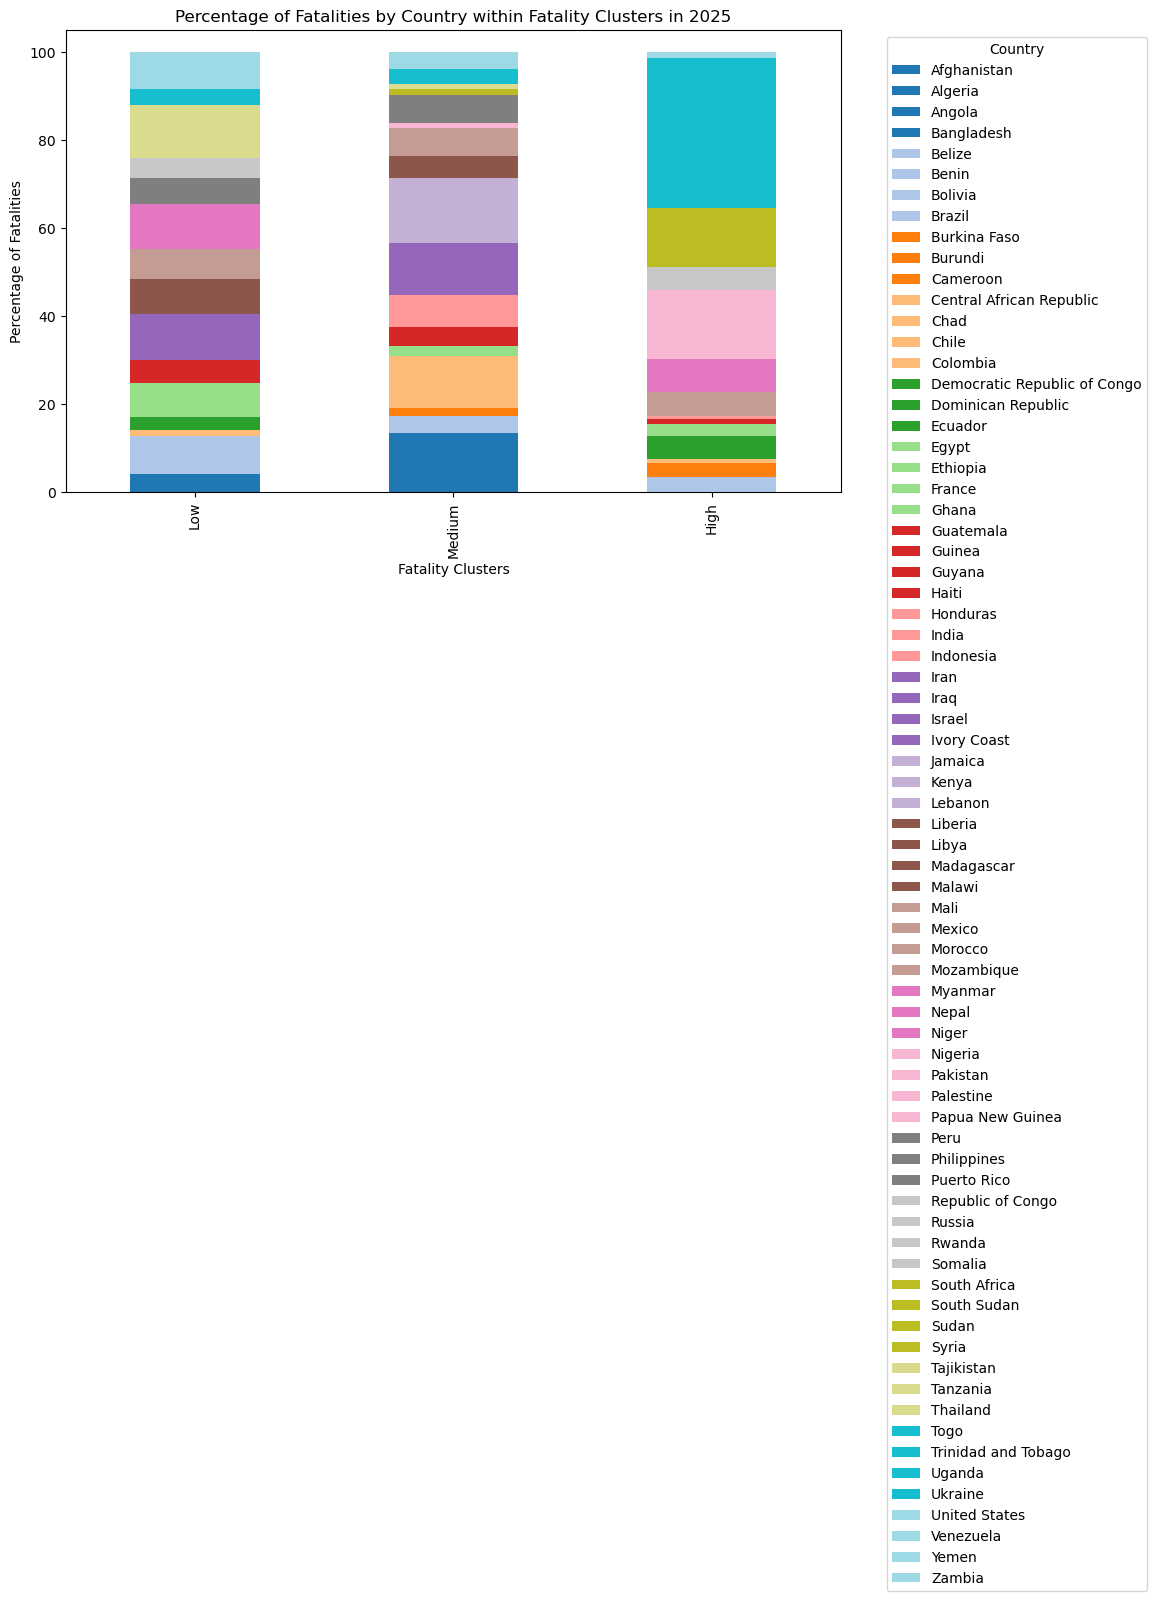

In [17]:
hundred_percent_country_cluster_counts = df_2025.groupby(['FATALITY_CLUSTER', 'COUNTRY'])['HUNDRED_PERCENT'].sum().unstack(fill_value=0).reindex(labels)
hundred_percent_country_cluster_counts.plot(kind='bar', stacked=True, colormap='tab20', figsize=(10, 6))
plt.xlabel('Fatality Clusters')
plt.ylabel('Percentage of Fatalities')
plt.title('Percentage of Fatalities by Country within Fatality Clusters in 2025')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()